# Introduction:

#### Bike rental system is a brilliant idea that brings in new hopes to the bike enthusiast for travelling oversease. It has been offering a convenient way to get around town.
#### A bike rental business rents out bicycles for short periods of time, usually for few hours. Through these systems, user is able to easily rent a bike from a particular position and return back at another position.


### The bike rental systems has many benifits:
#### Bike rental is an excellent way to promote environmental safety. It Eliminates the dependency on fuel and reduces the taffic and over crowd and thereby saves time.
#### Renting bike is cheaper than buying a new bike or renting cars
#### It can also handle parking issues
#### Renting a bike can offer neumerous benefits, it can help burn fat, build muscles, boosts  immunity and reduces depression.
#### Renting a bike is one the best ways to explore a destination while staying active and cost-effective.


#### Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.


# Business case:

### The business case is about to predict daily bike rental count based on the environmental and seasonal settings. 

## List Of Contents:
   ### 1. Importing Libraries
   ### 2. Attributes' Information
   ### 3. Basic Checks
   ### 4. Exploratory Data Analysis
   ### 5. Data Pre-Processing
   ### 6. Feature Selection
   ### 7. Model Creation
   ### 8. Model Evaluation
   ### 9. Evaluation Summary
   ### 10. Conclusion

## Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading datasets
day = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')

In [3]:
hour

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

## Attributes' Information

1. **instant**: record index.


2. **dteday** : date.


3. **season** : season (1:springer, 2:summer, 3:fall, 4:winter).


4. **yr** : year (0: 2011, 1:2012).


5. **mnth** : month ( 1 to 12).


6. **hr** : hour (0 to 23).


7. **holiday** : weather day is holiday or not.


8. **weekday** : day of the week.


9. **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.


10. **weathersit** : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


11. **temp** : Normalized temperature in Celsius. The values are divided to 41 (max).


12. **atemp**: Normalized feeling temperature in Celsius. The values are divided to 50 (max).


13. **hum** : Normalized humidity. The values are divided to 100 (max).


14. **windspeed** : Normalized wind speed. The values are divided to 67 (max).


15. **casual** : count of casual users.


16. **registered** : count of registered users.


17. **cnt** : count of total rental bikes including both casual and registered users.

## Basic checks

In [4]:
# Getting first 5 rows
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [6]:
## Finding the shape of dataset
day.shape

(731, 16)

In [7]:
## Finding the shape of dataset
hour.shape            

(17379, 17)

### The data has 17379 records with 17 features

In [8]:
## Quick summary of dataset
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
## dteday is in string format so we are converting the string to date-time
hour['dteday'] = pd.DatetimeIndex(hour['dteday']).day

In [10]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  int64  
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 2.3 MB


In [11]:
## Finding duplicate records
hour.duplicated().sum()

0

### There are no duplicate records in the dataset

In [12]:
## Checking for null values
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### There are no null values in the dataset

In [13]:
## Statistical information about numerical data
hour.describe()

instant        dteday        season            yr          mnth  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000     15.683411      2.501640      0.502561      6.537775   
std     5017.0295      8.789373      1.106918      0.500008      3.438776   
min        1.0000      1.000000      1.000000      0.000000      1.000000   
25%     4345.5000      8.000000      2.000000      0.000000      4.000000   
50%     8690.0000     16.000000      3.000000      1.000000      7.000000   
75%    13034.5000     23.000000      3.000000      1.000000     10.000000   
max    17379.0000     31.000000      4.000000      1.000000     12.000000   

                 hr       holiday       weekday    workingday    weathersit  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean      11.546752      0.028770      3.003683      0.682721      1.425283   
std        6.914405      0.167165      2.005771      0.465431      0.639357   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        6.000000      0.000000      1.000000      0.000000      1.000000   
50%       12.000000      0.000000      3.000000      1.000000      1.000000   
75%       18.000000      0.000000      5.000000      1.000000      2.000000   
max       23.000000      1.000000      6.000000      1.000000      4.000000   

               temp         atemp           hum     windspeed        casual  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.496987      0.475775      0.627229      0.190098     35.676218   
std        0.192556      0.171850      0.192930      0.122340     49.305030   
min        0.020000      0.000000      0.000000      0.000000      0.000000   
25%        0.340000      0.333300      0.480000      0.104500      4.000000   
50%        0.500000      0.484800      0.630000      0.194000     17.000000   
75%        0.660000      0.621200      0.780000      0.253700     48.000000   
max        1.000000      1.000000      1.000000      0.850700    367.000000   

         registered           cnt  
count  17379.000000  17379.000000  
mean     153.786869    189.463088  
std      151.357286    181.387599  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%      115.000000    142.000000  
75%      220.000000    281.000000  
max      886.000000    977.000000

### There is no 0.00 constant standard deviation columns.

### There are no categorical data which need to be encoded.

# Exploratory Data Analysis

### Segregating numerical columns and categorical columns

In [14]:
cat_cols = hour[['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']]
num_cols = hour[['instant','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt' ]]

## Univariate Analysis

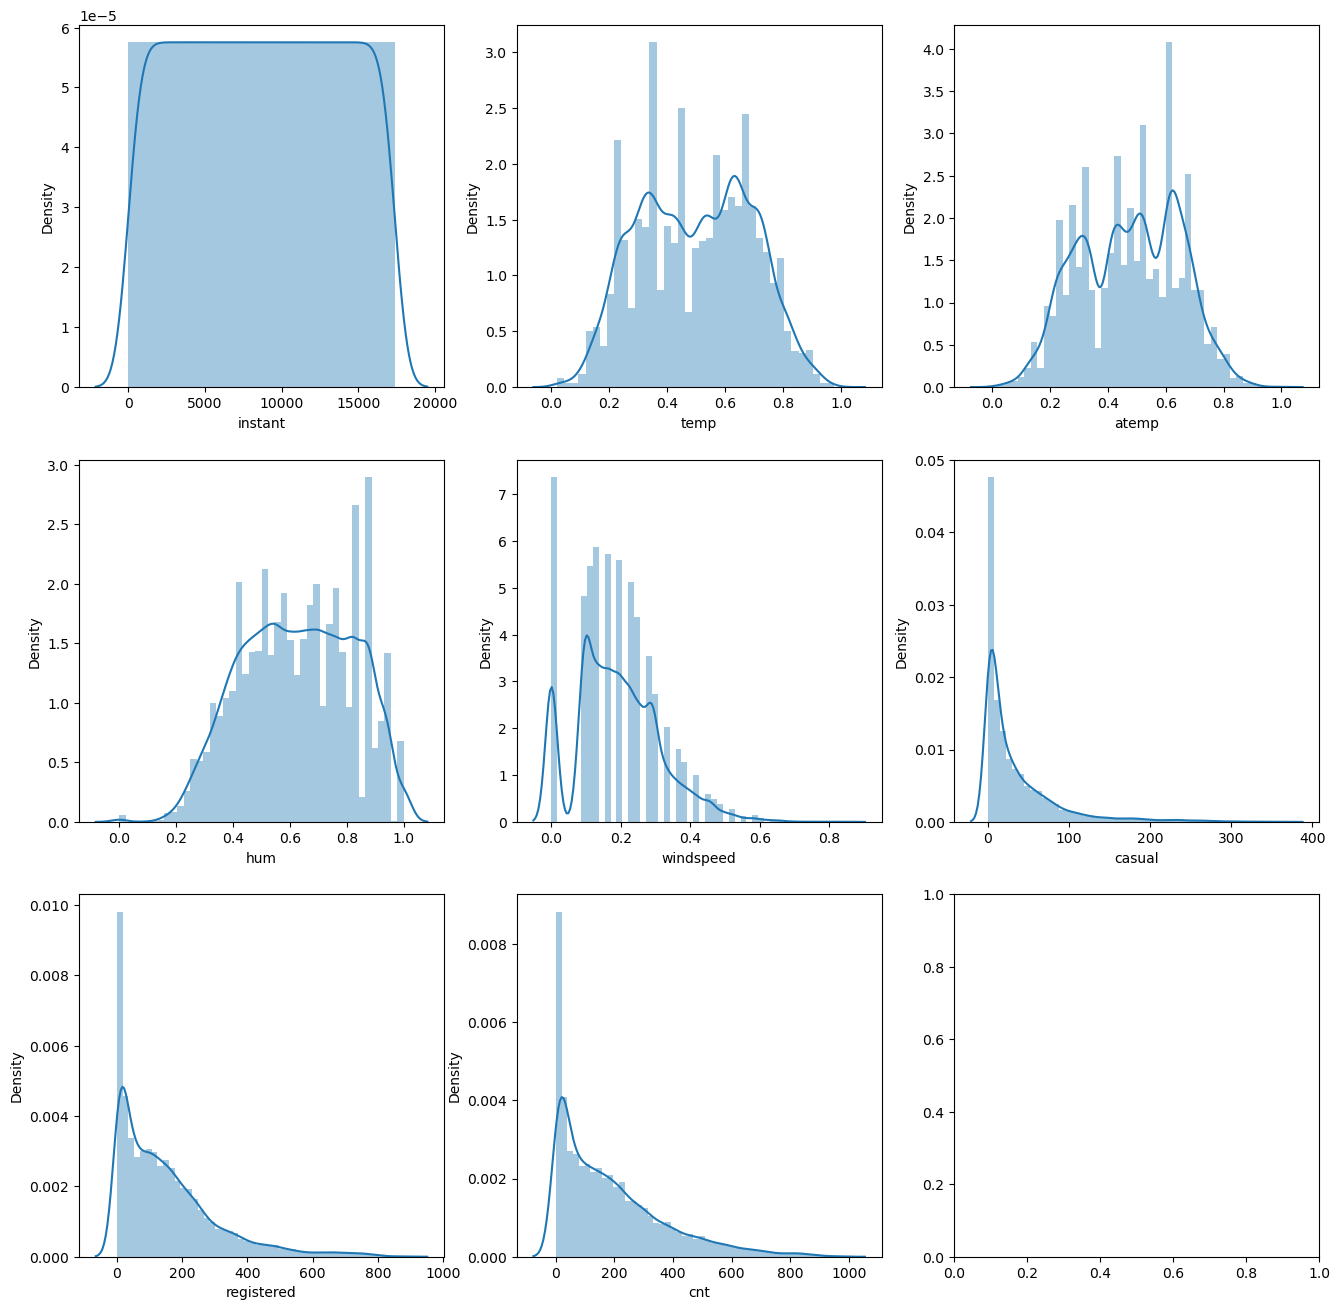

In [15]:
## Analysing numerical features

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(hour['instant'],ax=ax2[0][0])
sns.distplot(hour['temp'],ax=ax2[0][1])
sns.distplot(hour['atemp'],ax=ax2[0][2])
sns.distplot(hour['hum'],ax=ax2[1][0])
sns.distplot(hour['windspeed'],ax=ax2[1][1])
sns.distplot(hour['casual'],ax=ax2[1][2])
sns.distplot(hour['registered'],ax=ax2[2][0])
sns.distplot(hour['cnt'],ax=ax2[2][1])
plt.show()

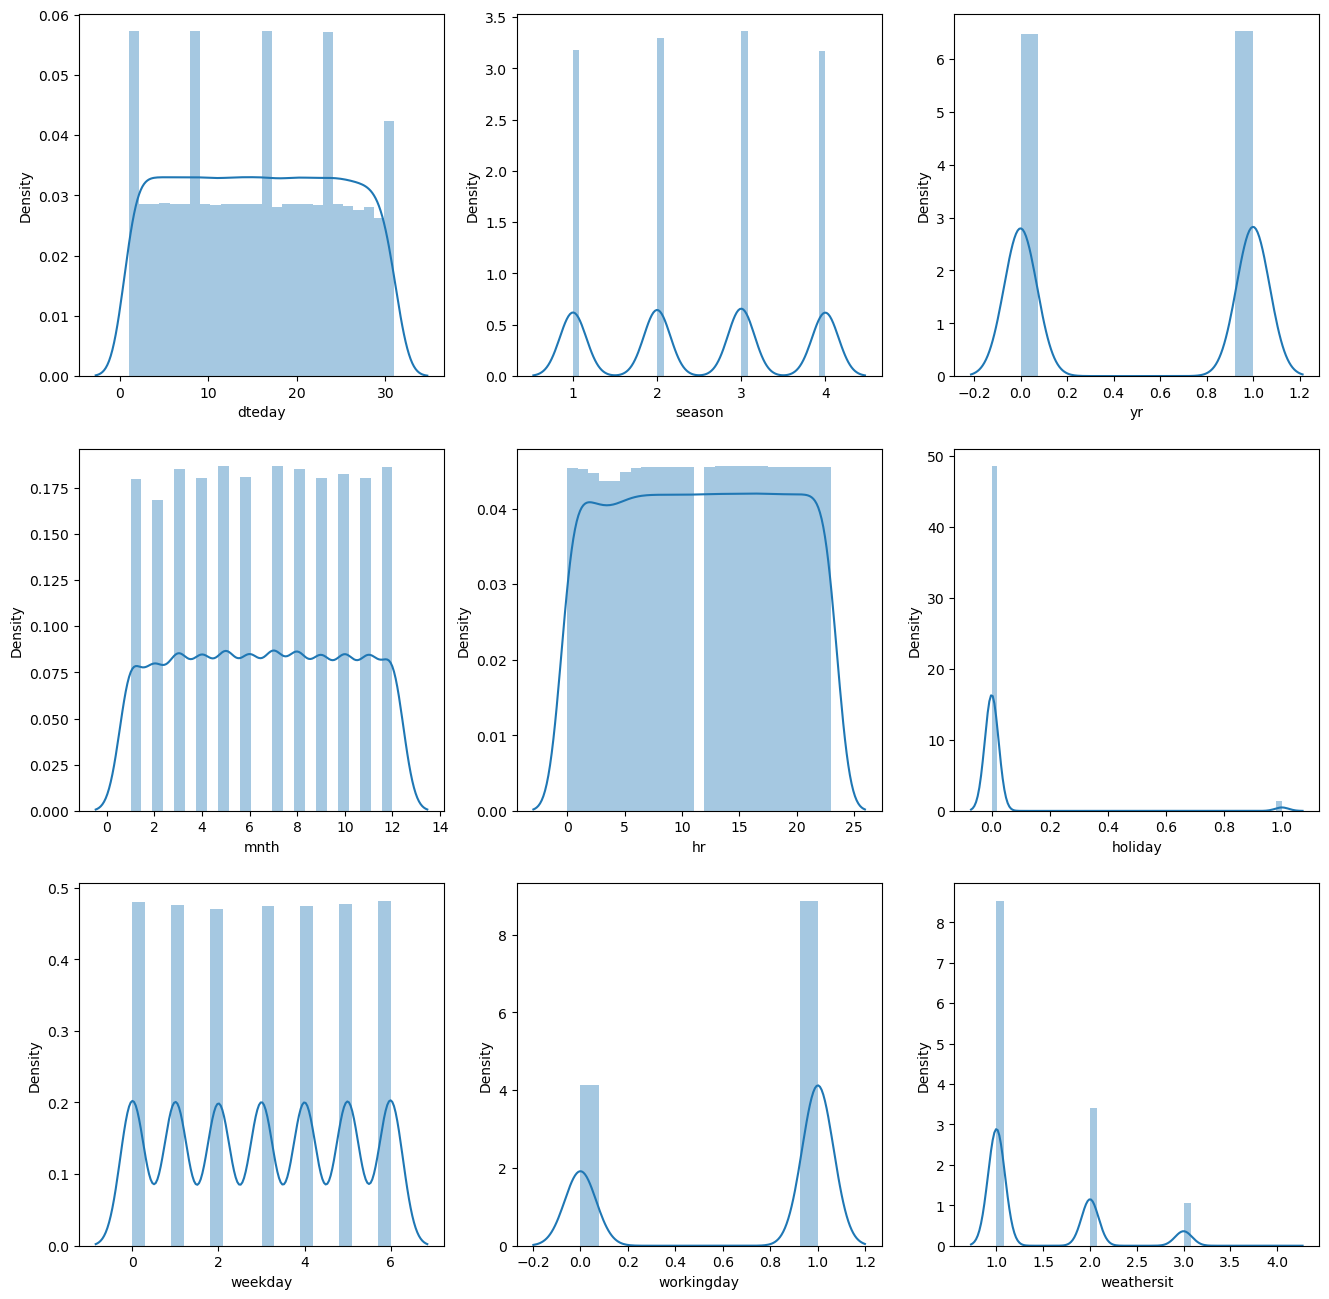

In [16]:
## Analysing categorical features

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(hour['dteday'],ax=ax2[0][0])
sns.distplot(hour['season'],ax=ax2[0][1])
sns.distplot(hour['yr'],ax=ax2[0][2])
sns.distplot(hour['mnth'],ax=ax2[1][0])
sns.distplot(hour['hr'],ax=ax2[1][1])
sns.distplot(hour['holiday'],ax=ax2[1][2])
sns.distplot(hour['weekday'],ax=ax2[2][0])
sns.distplot(hour['workingday'],ax=ax2[2][1])
sns.distplot(hour['weathersit'],ax=ax2[2][2])
plt.show()

In [17]:
import sweetviz as sv
my_report = sv.analyze(hour)
my_report.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights from univariate analysis
#### 1. Season      - Every season has equal proportion of demand with little difference.
#### 2. Year        - The data is distributed 50/50 i.e 2011 and 2012 respectively.
#### 3. Month       - May, july and december months have maximum demand.
#### 4. Hour        - We can see the peakness in the following hours 0-1,7-8,15,22-23.
#### 5. Holiday     - The demand is more on working days i.e 97%.
#### 6. Weekday     - Every day has equal demand.
#### 7. Workingday  - Working day has more demand than holidays.
#### 8. Weathersit  - The clear day(1) has more demand than other days. There is no demand for rented bikes during heavy rain(4). 
#### 9. Temperature - The high frequency is b/w 0.20 to 0.79.
#### 10. atemp      - The actual feeling of temperature has linear movement from 0.20 -0.62.
#### 11. Humidity   - High frequency is b/w 0.42-0.82.
#### 12. Windspeed  - The peakness is b/w 0.10 to 0.17.
#### 13. Casual     - Count of casual customers are more at 0.
#### 14. Registered - Count of 4,3,5,6 are more frequent when compared to others.
#### 15. Count      - The sum of casual and registered is more at the count 5.
#### 16. No feature is normally distributed.
#### 17. Windspeed, casual, registered and count columns are right skewed. 

## Bivariate Analysis

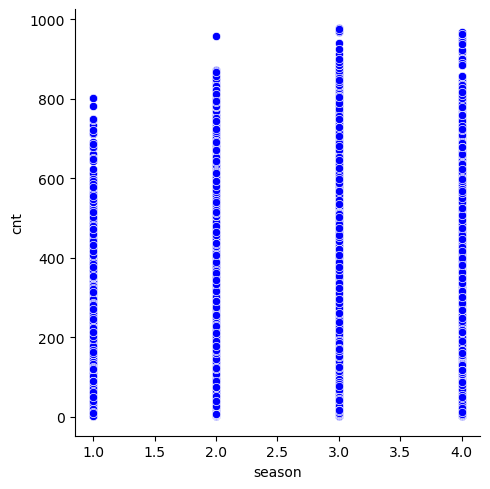

In [18]:
# season vs count
sns.relplot(x = hour['season'], y = hour['cnt'], color = 'blue')

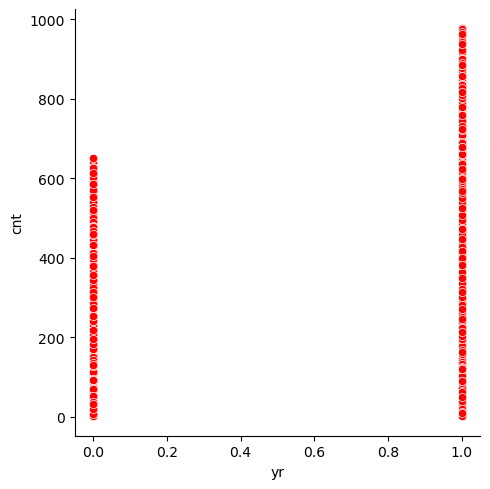

In [19]:
# year vs count
sns.relplot(x = hour['yr'], y = hour['cnt'], color = 'red')

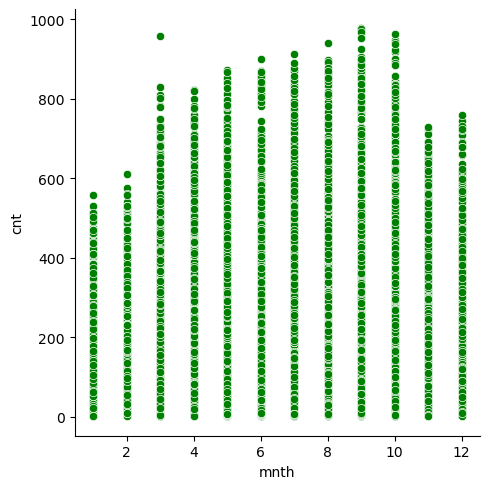

In [20]:
# month vs count
sns.relplot(x = hour['mnth'], y = hour['cnt'], color = 'green')

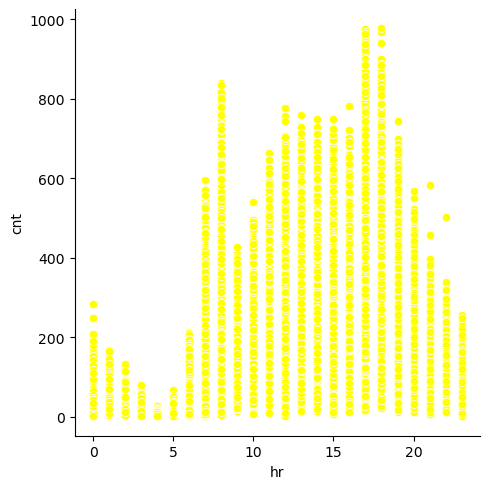

In [21]:
# hour vs count
sns.relplot(x = hour['hr'], y = hour['cnt'], color = 'yellow')

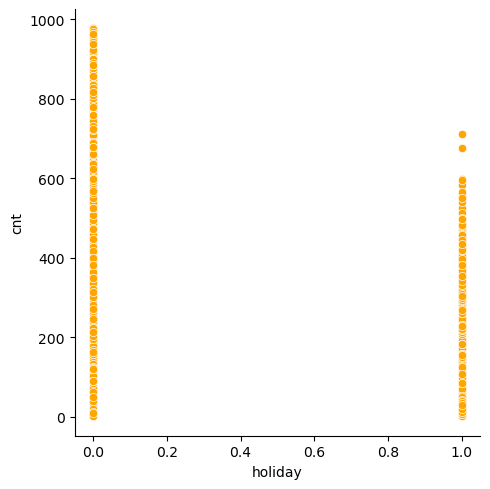

In [22]:
# holiday vs count
sns.relplot(x = hour['holiday'], y = hour['cnt'], color = 'orange')

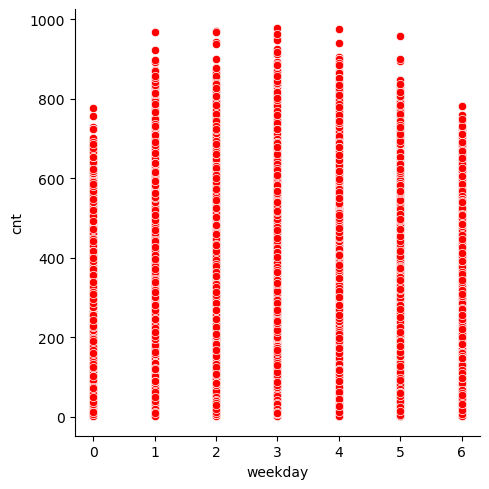

In [23]:
# weekday vs count
sns.relplot(x = hour['weekday'], y = hour['cnt'], color = 'red')

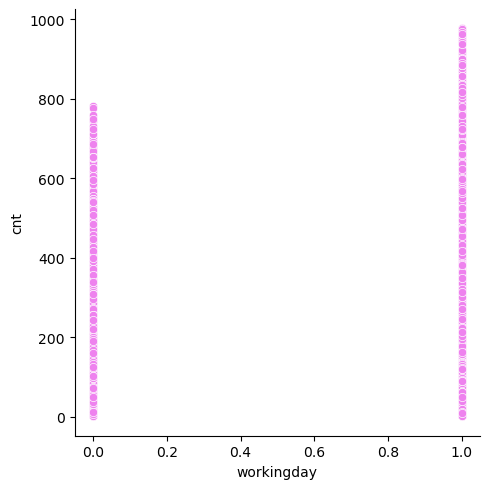

In [24]:
# workingday vs count
sns.relplot(x = hour['workingday'], y = hour['cnt'], color = 'violet')

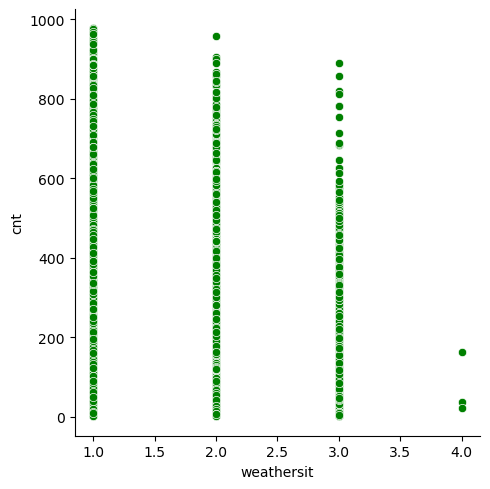

In [25]:
# weathersit vs count
sns.relplot(x = hour['weathersit'], y = hour['cnt'], color = 'green')

<Axes: xlabel='temp', ylabel='cnt'>

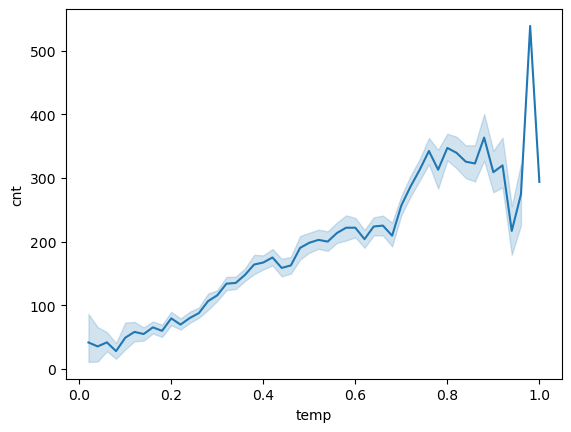

In [26]:
# temperature vs count
sns.lineplot(x='temp', y='cnt', data=hour)

<Axes: xlabel='atemp', ylabel='cnt'>

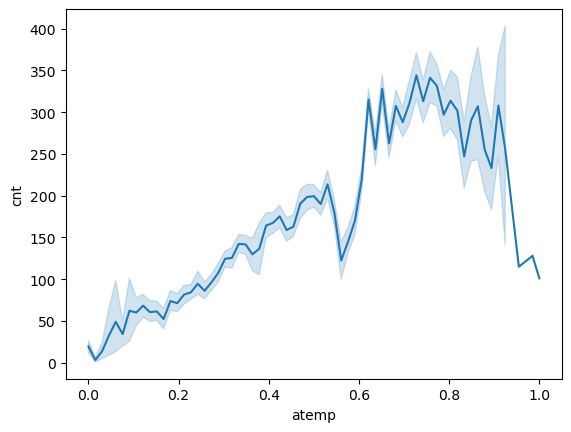

In [27]:
# absolute temperature vs count
sns.lineplot(x='atemp', y='cnt', data=hour)

<Axes: xlabel='hum', ylabel='cnt'>

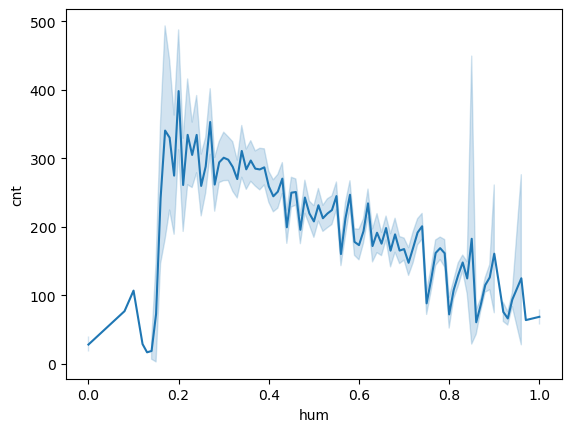

In [28]:
# humidity vs count
sns.lineplot(x='hum', y='cnt', data=hour)

<Axes: xlabel='windspeed', ylabel='cnt'>

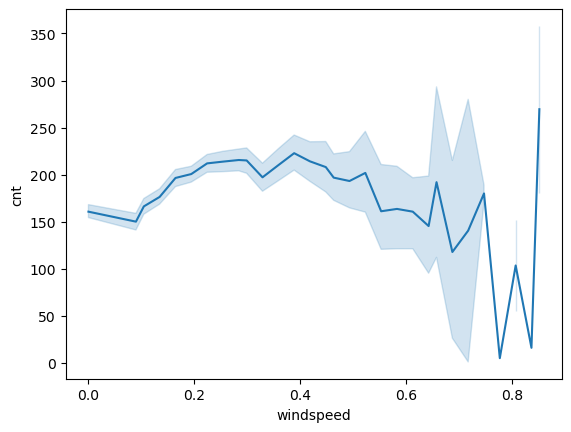

In [29]:
# windspeed vs count
sns.lineplot(x='windspeed', y='cnt', data=hour)

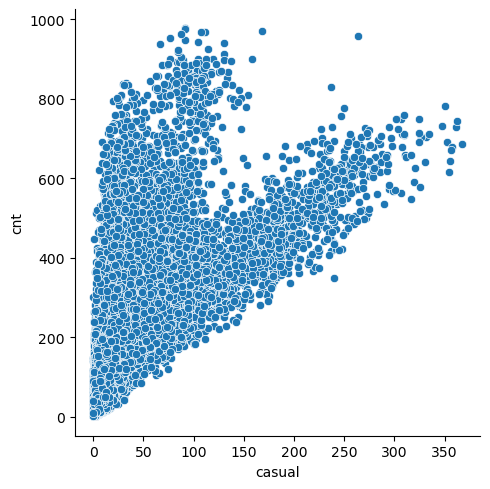

In [30]:
# casual vs count
sns.relplot(x='casual', y='cnt', data=hour)

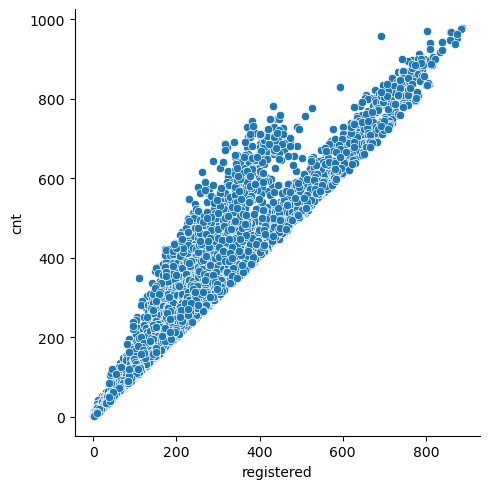

In [31]:
# registered vs count
sns.relplot(x='registered', y='cnt', data=hour)

### Insights from bivariate analysis 

#### 1. Season - There is less demand in the winter season as compared to other seasons.
#### 2. Year   - The demand for renting bikes is incresed in the year 2012 when compared to the year 2011.
#### 3. Month  - The demand is very less in first 2 months and then it has increased from  5th month to 10th month. Again it goes on decreasing in last 2 months.
#### 4. Hour   - The demand goes on decreasing from midningt to early morning 4. Demand starts to increase from 5 am till 8 am. we can see the peakness at 8th hour and then it maintained same demand from 11 to 17 and we can again see the peakness at 5pm and 6pm. Again there is a gradual decrease from 7 pm till 11 pm.
#### 5. Holiday- There is a less demand on holidays.
#### 6. weekday- There is less demand on weekends. 
#### 7. Workingday - There is high demand on workingdays.
#### 8. Weathersit - When the weather is becoming worse we can see that there is gradual decrease in the demand.
#### 9. Temperature- There is a positive linear relationship b/w temperature and the demand but when there is max temperature the demand again falls.
#### 10. atemp  - There is a positive linear relationship b/w  absolute temperature and the demand but when there is max absolute temperature the demand again falls.
#### 11. Humidity - The demand is peaked when there is less humidity and we can see gradual decrease in demand with the increase in humidity.
#### 12. Windspeed - There is no defined relationship between windspeed and deamand. 
#### 13. Casual  - Casual users are very less as compared to registered users.
#### 14. Registered - Registered people  are the key players in renting bikes.

## Multivariate Analysis

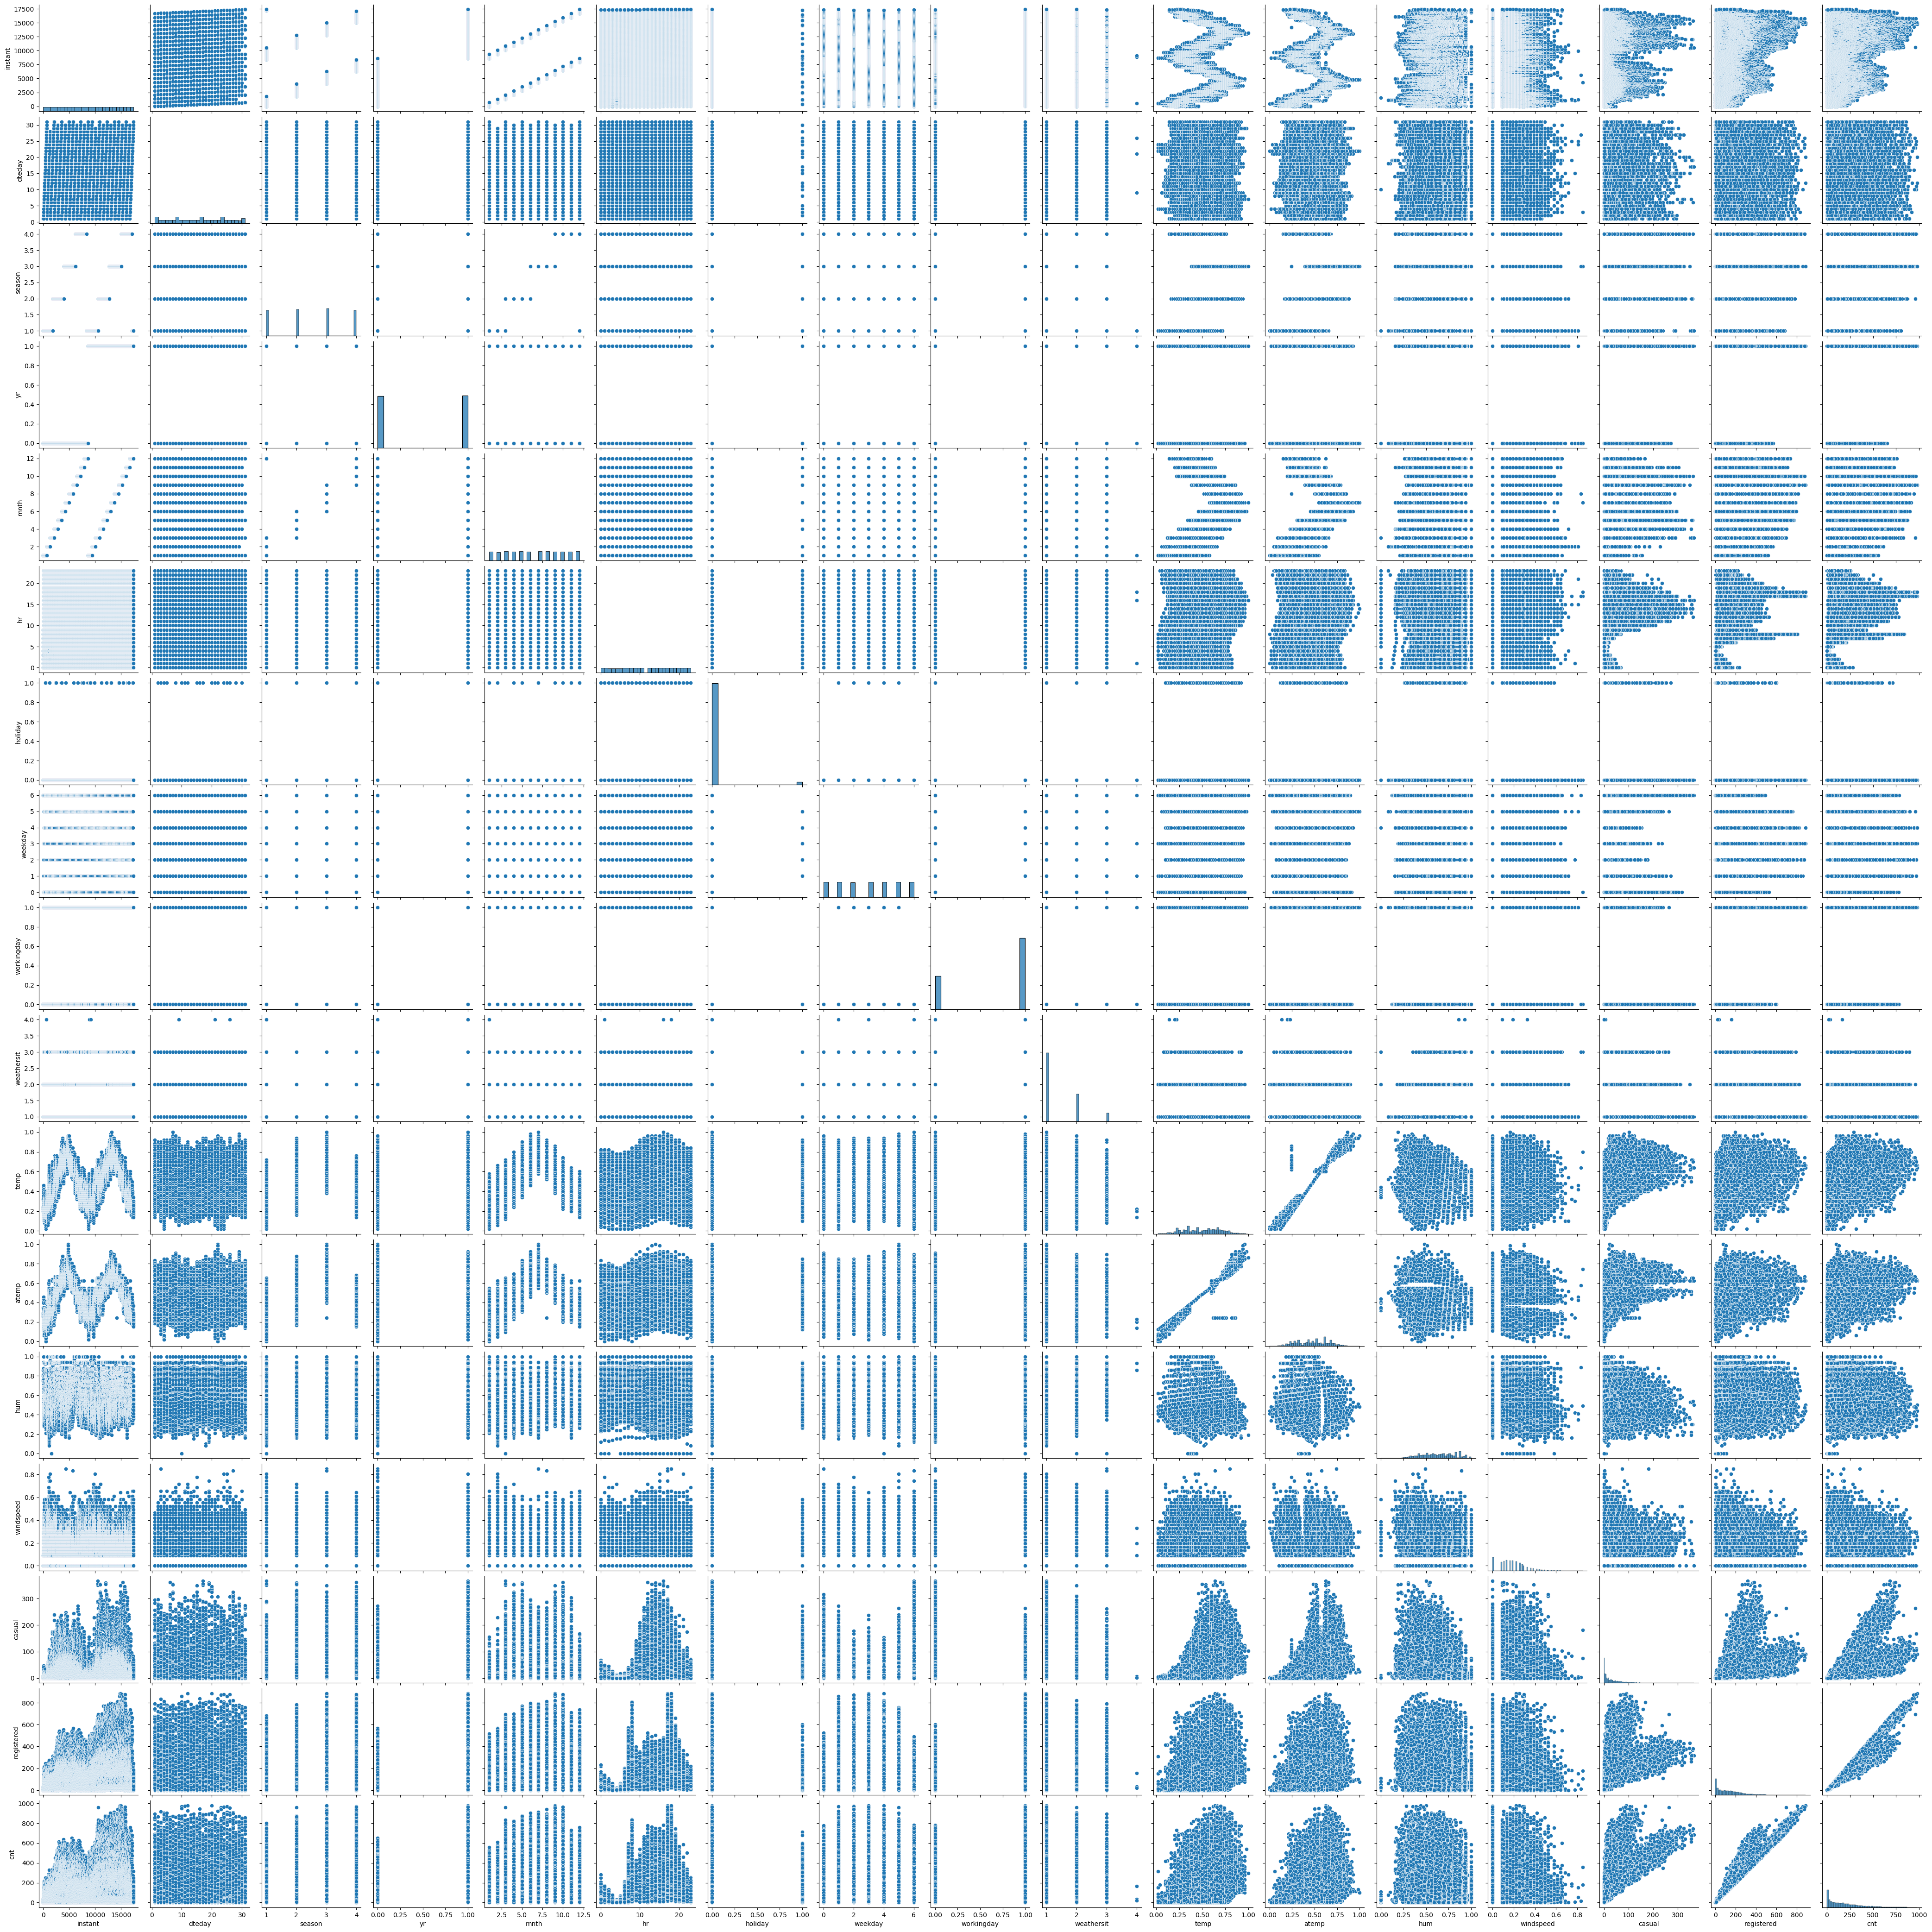

In [32]:
sns.pairplot(hour)
plt.show()

### Insights from multivariate analysis

#### Temperature and absolute temperature both are positively correlated

# Data pre-processing

## Checking for outliers

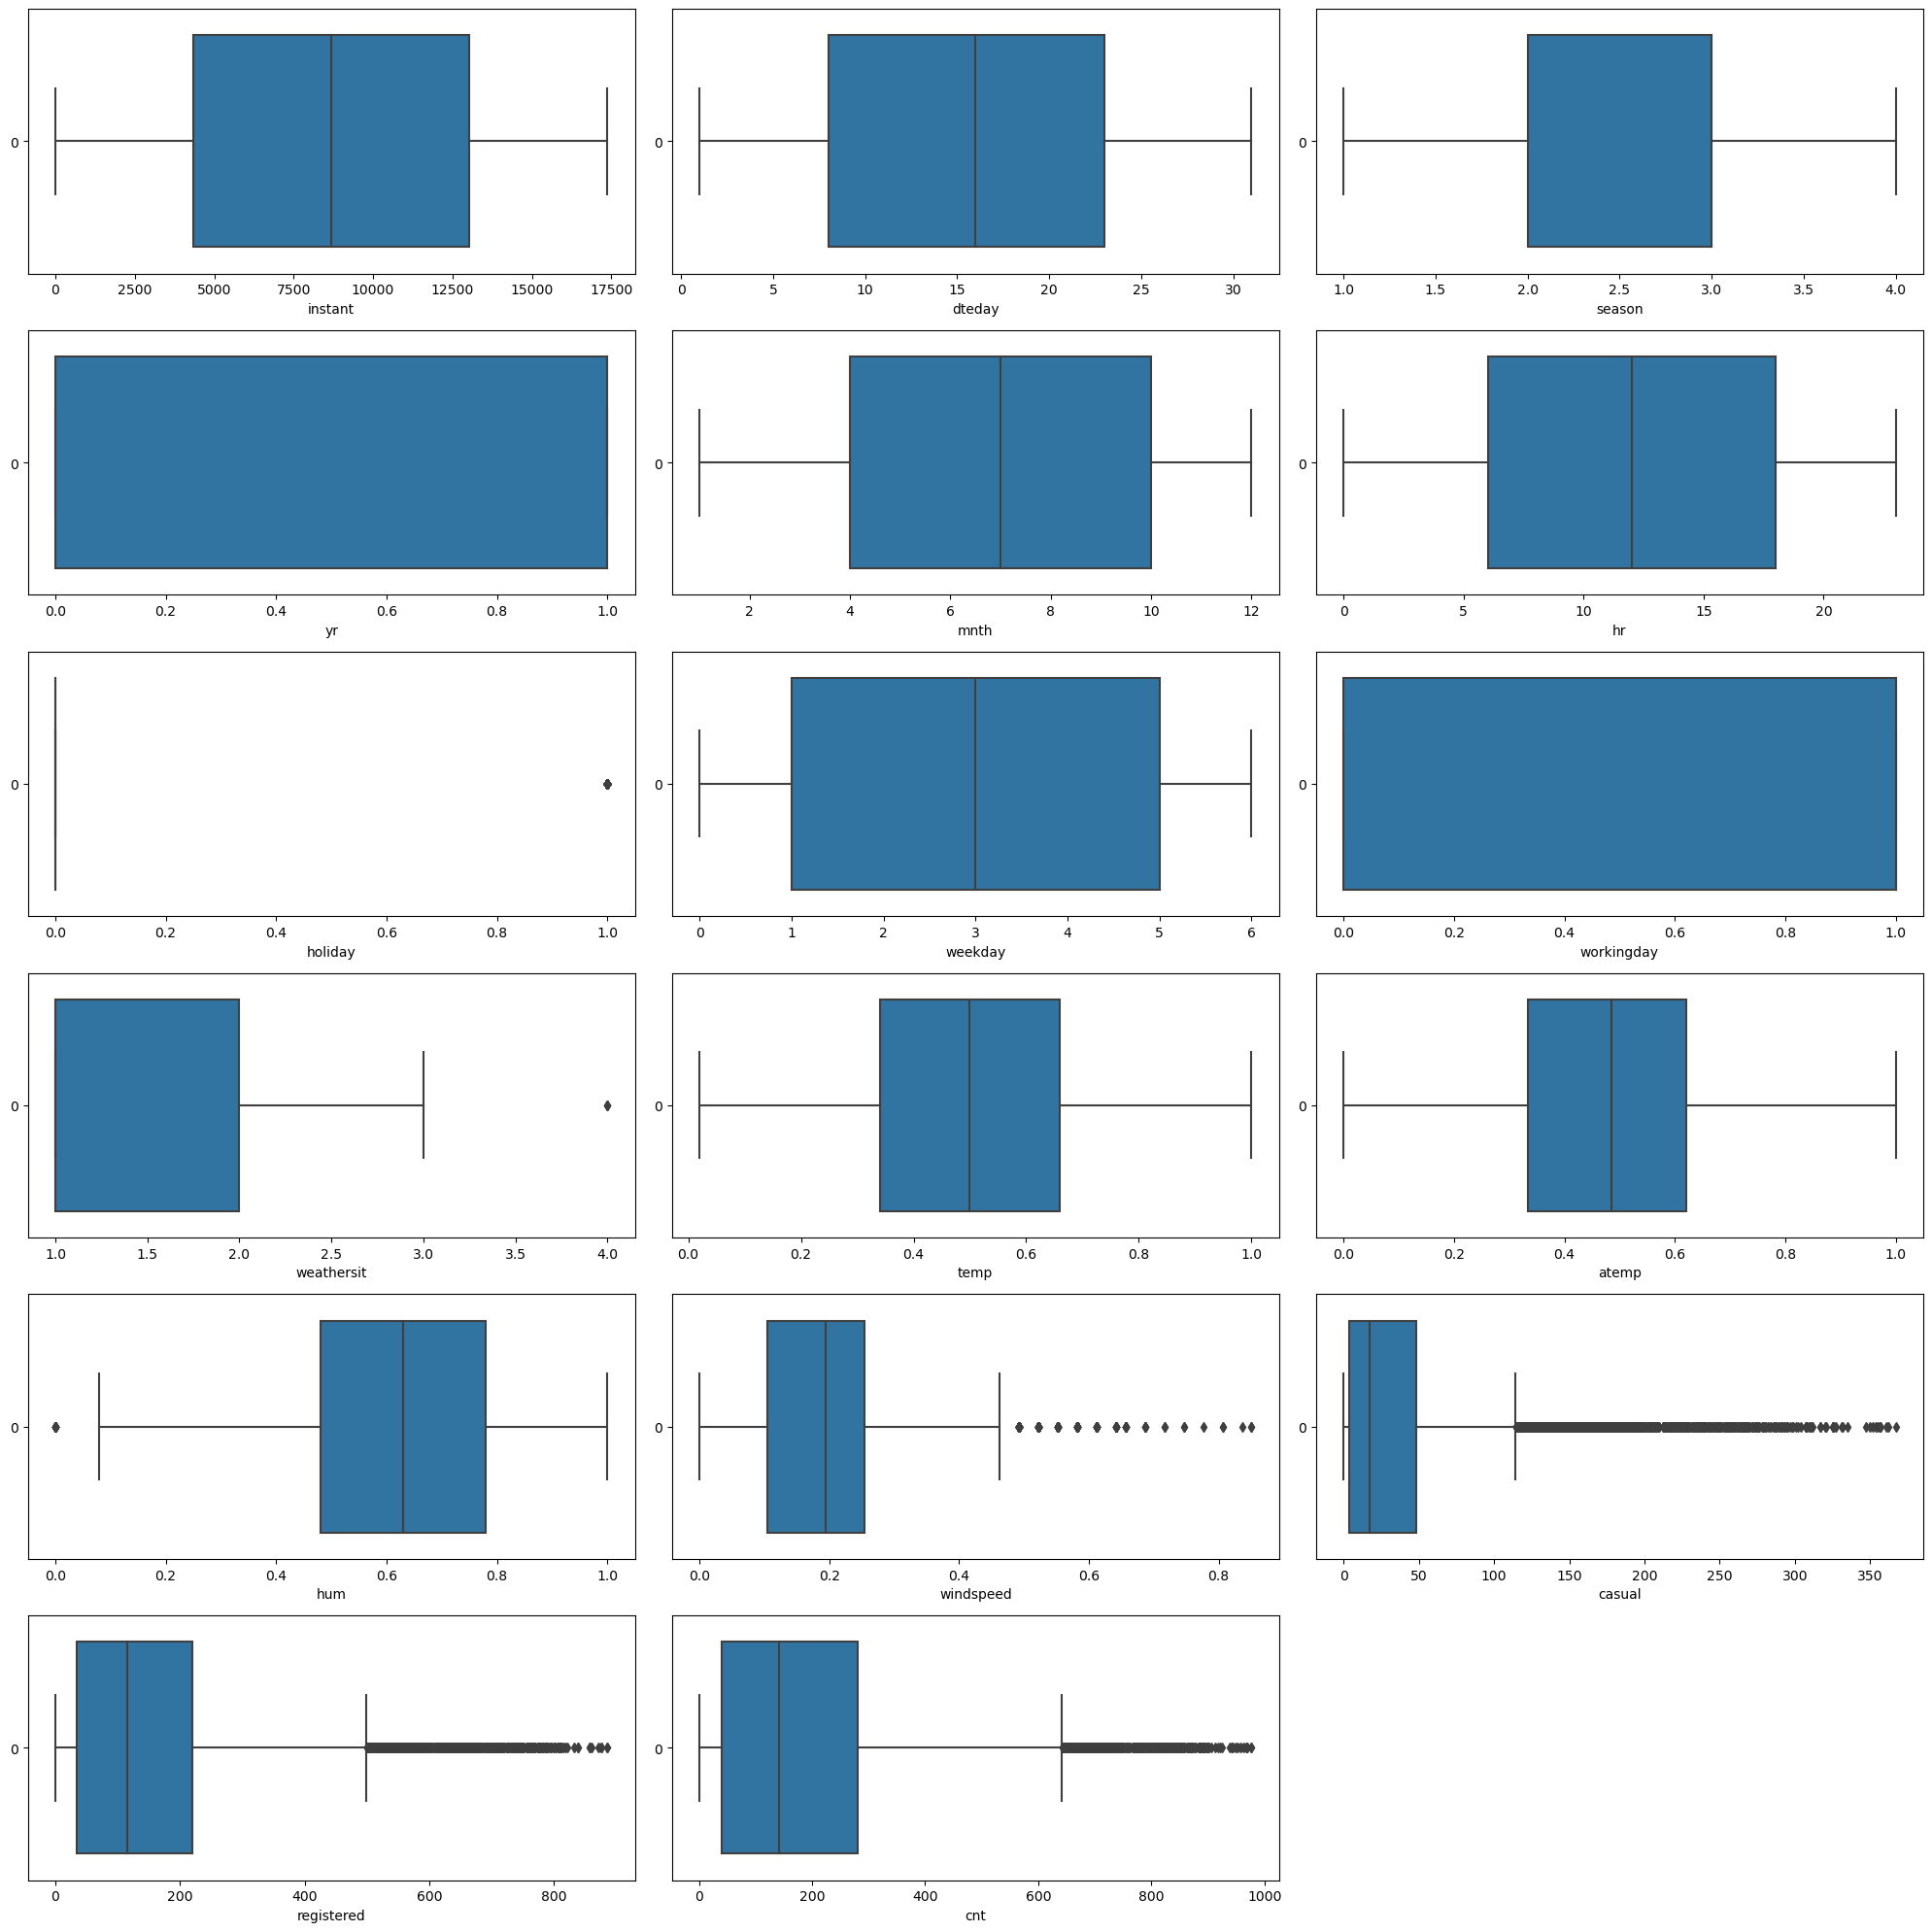

In [33]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in hour:
    if plotnumber<=18:
        plt.subplot(6,3,plotnumber)
        sns.boxplot(hour[column],orient='h')
        plt.xlabel(column,fontsize=10)
        plt.xticks(fontsize=10)
        plotnumber+=1   
plt.tight_layout()

#### The features `humidity`, `windspeed`, `casual`, `registerd` and `count`  are having outliers.
#### So lets check the percentage of outliers in the above mentioned features.

### Humidity:

In [34]:
from scipy import stats
IQR = stats.iqr(hour['hum'], interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = hour['hum'].quantile(0.25)

# Third quartile (Q3) 
Q3 =hour['hum'].quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR


print(len(hour.loc[hour['hum']>max_limit]))
print(len(hour.loc[hour['hum']<min_limit]))

0
22


In [35]:
len(hour)

17379

In [36]:
22/len(hour)*100

0.1265895621151965

#### As there are very less % of outliers in humidity column, we are not imputing those

### Windspeed:

In [37]:
from scipy import stats
IQR = stats.iqr(hour['windspeed'], interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = hour['windspeed'].quantile(0.25)

# Third quartile (Q3) 
Q3 =hour['windspeed'].quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR


print(len(hour.loc[hour['windspeed']>max_limit]))
print(len(hour.loc[hour['windspeed']<min_limit]))

342
0


In [38]:
342/len(hour)*100

1.9678922837907822

#### As there are very less % of outliers in windspeed column, we are not imputing those

### Casual:

In [39]:
from scipy import stats
IQR = stats.iqr(hour['casual'], interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = hour['casual'].quantile(0.25)

# Third quartile (Q3) 
Q3 =hour['casual'].quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR


print(len(hour.loc[hour['casual']>max_limit]))
print(len(hour.loc[hour['casual']<min_limit]))

1192
0


In [40]:
1192/len(hour)*100

6.858852638241555

#### As there are less % of outliers in registered column, we are not imputing those

### Registered:

In [41]:
from scipy import stats
IQR = stats.iqr(hour['registered'], interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = hour['registered'].quantile(0.25)

# Third quartile (Q3) 
Q3 =hour['registered'].quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR


print(len(hour.loc[hour['registered']>max_limit]))
print(len(hour.loc[hour['registered']<min_limit]))

680
0


In [42]:
680/len(hour)*100

3.9127682835606192

#### As there are less % of outliers in casual column, we are not imputing those

### Count:
#### The count column also contains outliers but its not preffered to handle the outliers of target variable.

# Feature selection

### Removing redundant features

In [44]:
hour.drop(['instant','dteday'],axis=1,inplace=True)

## Checking correlation between the features

<Axes: >

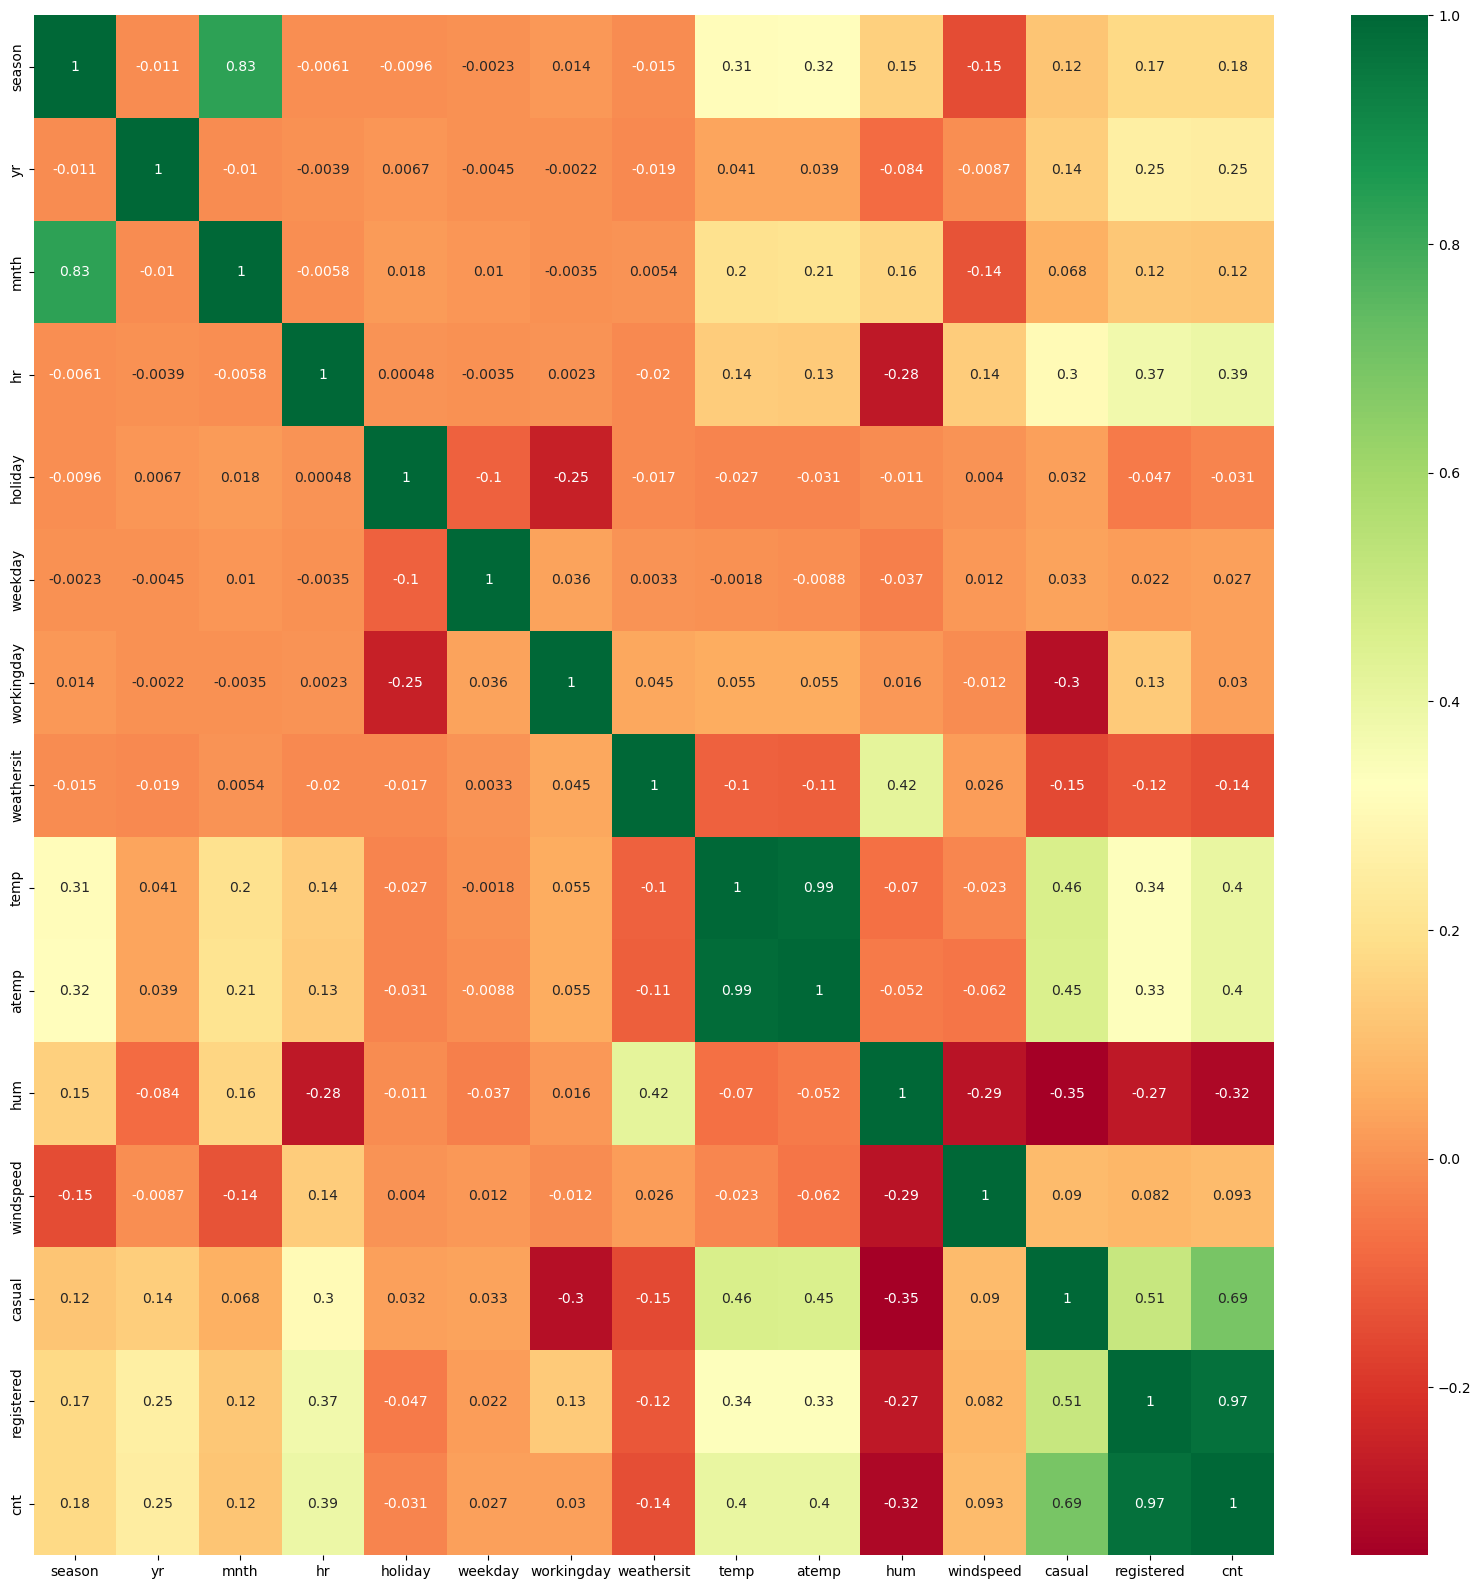

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(hour.corr(),annot=True,cmap="RdYlGn")

### As there is high correlation between the features `temp` and `atemp`, we are dropping 'temp' column.

In [46]:
hour.drop('temp',axis=1,inplace=True)

In [47]:
## Creating independent and dependent variable
X=hour.drop('cnt',axis=1)
y=hour.cnt

### Splitting the data into train set and test set

In [48]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size=0.15)

### Scaling the data

#### As we will be using many distance based Machine learning models and since the range of features are not in the same scale, we will scale the data

In [49]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [50]:
X

season  yr  mnth  hr  holiday  weekday  workingday  weathersit   atemp  \
0           1   0     1   0        0        6           0           1  0.2879   
1           1   0     1   1        0        6           0           1  0.2727   
2           1   0     1   2        0        6           0           1  0.2727   
3           1   0     1   3        0        6           0           1  0.2879   
4           1   0     1   4        0        6           0           1  0.2879   
...       ...  ..   ...  ..      ...      ...         ...         ...     ...   
17374       1   1    12  19        0        1           1           2  0.2576   
17375       1   1    12  20        0        1           1           2  0.2576   
17376       1   1    12  21        0        1           1           1  0.2576   
17377       1   1    12  22        0        1           1           1  0.2727   
17378       1   1    12  23        0        1           1           1  0.2727   

        hum  windspeed  casual  registered  
0      0.81     0.0000       3          13  
1      0.80     0.0000       8          32  
2      0.80     0.0000       5          27  
3      0.75     0.0000       3          10  
4      0.75     0.0000       0           1  
...     ...        ...     ...         ...  
17374  0.60     0.1642      11         108  
17375  0.60     0.1642       8          81  
17376  0.60     0.1642       7          83  
17377  0.56     0.1343      13          48  
17378  0.65     0.1343      12          37  

[17379 rows x 13 columns]

# Model Creation 

In [51]:
## Importig the required models

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [52]:
## Importing requried evaluation metrics

import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score

## Linear Regression

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_hat = lr.predict(X_train)
y_pred = lr.predict(X_test)

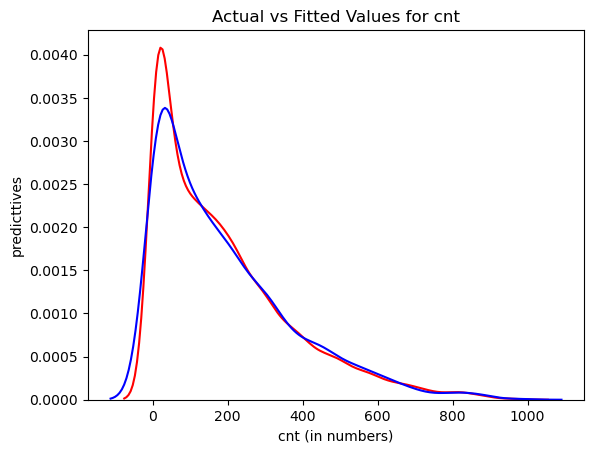

In [54]:
ax1=sns.distplot(hour['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [55]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
import math
rmse= math.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [56]:
X_train.shape

(14772, 13)

In [57]:
print("metrics on train data \n")

print("r2score:", r2_score(y_train, y_hat))
print("mse:", mean_squared_error(y_train, y_hat))
print("rmse:", math.sqrt(mean_squared_error(y_train, y_hat)))
print("mae:", mean_absolute_error(y_train, y_hat))

metrics on train data 

r2score: 1.0
mse: 1.667503015563845e-25
rmse: 4.0835070901907896e-13
mae: 3.471340238456006e-13


In [58]:
adj_r2score = 1-(1-1)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 1.0


In [59]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 1.0
mse: 1.70971760935966e-25
rmse: 4.134873165357869e-13
mae: 3.520917095789142e-13


In [60]:
adj_r2score = 1-(1-1)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 1.0


## Support Vector Regressor

In [61]:
svr=SVR()
svr.fit(X_train, y_train)

y_hat = svr.predict(X_train)
y_pred = svr.predict(X_test)

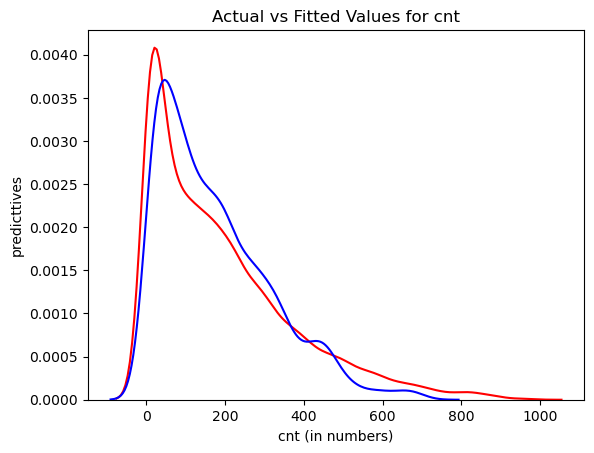

In [62]:
ax1=sns.distplot(hour['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [63]:
print("metrics on train data \n")

print("r2score:", r2_score(y_train, y_hat))
print("mse:", mean_squared_error(y_train, y_hat))
print("rmse:", math.sqrt(mean_squared_error(y_train, y_hat)))
print("mae:", mean_absolute_error(y_train, y_hat))

metrics on train data 

r2score: 0.9132034277600174
mse: 2848.535904575886
rmse: 53.37167698860404
mae: 33.68953220539932


In [64]:
adj_r2score = 1-(1-0.9132)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.9131665252603163


In [65]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.9101334615020396
mse: 2997.682330155265
rmse: 54.751094328380915
mae: 34.60572697067464


In [66]:
adj_r2score = 1-(1-0.9101)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.910065329733899


## KNN

In [67]:
error_rate=[]
for i in range(1,11):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

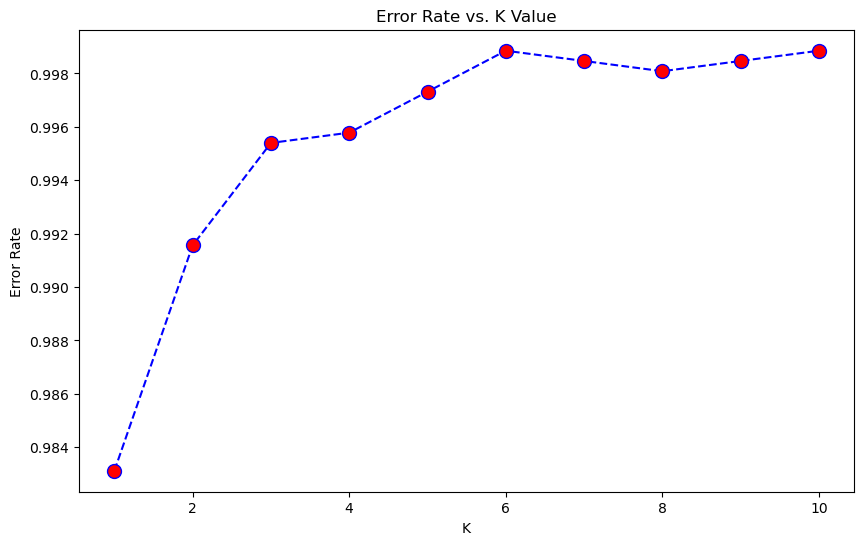

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [69]:
# chosing k value as 3
knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X_train,y_train)

y_hat = knn1.predict(X_train)
y_pred = knn1.predict(X_test)

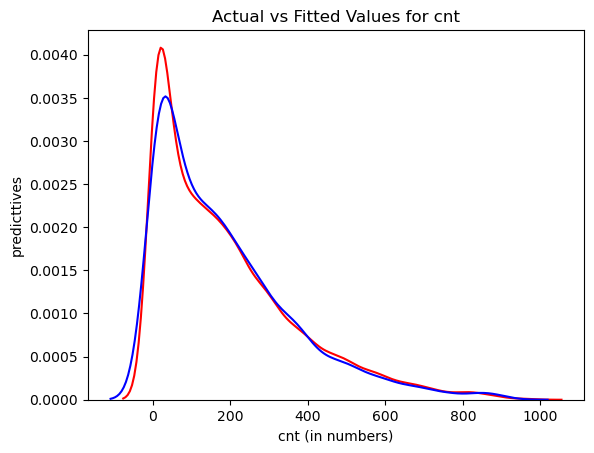

In [70]:
ax1=sns.distplot(hour['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [71]:
print("metrics on train data \n")

print("r2score:", r2_score(y_train, y_hat))
print("mse:", mean_squared_error(y_train, y_hat))
print("rmse:", math.sqrt(mean_squared_error(y_train, y_hat)))
print("mae:", mean_absolute_error(y_train, y_hat))

metrics on train data 

r2score: 0.9767041484847476
mse: 764.5356003851131
rmse: 27.650236895641836
mae: 19.525521256431087


In [72]:
adj_r2score = 1-(1-9767)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 9770.766293868106


In [73]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.9526834054884802
mse: 1578.3418573924905
rmse: 39.728350801316815
mae: 27.872522695307506


In [74]:
adj_r2score = 1-(1-0.9526)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.9525817200154262


## Decision Tree

In [75]:
dt=DecisionTreeRegressor()  
dt.fit(X_train,y_train)

y_hat = dt.predict(X_train)
y_pred = dt.predict(X_test)

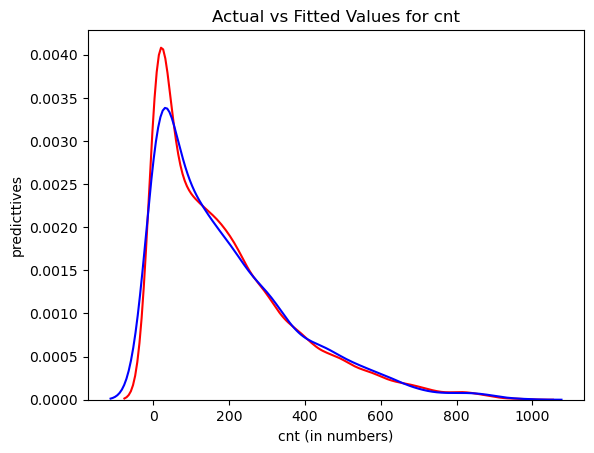

In [76]:
ax1=sns.distplot(hour['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [77]:
print("metrics on train data \n")

print("r2score:", r2_score(y_train, y_hat))
print("mse:", mean_squared_error(y_train, y_hat))
print("rmse:", math.sqrt(mean_squared_error(y_train, y_hat)))
print("mae:", mean_absolute_error(y_train, y_hat))

metrics on train data 

r2score: 1.0
mse: 0.0
rmse: 0.0
mae: 0.0


In [78]:
adj_r2score = 1-(1-1)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 1.0


In [79]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.9992512461301807
mse: 24.976217874952052
rmse: 4.997621221636555
mae: 2.301879555044112


In [80]:
adj_r2score = 1-(1-0.9993)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.9992997300424219


## Random Forest

In [81]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_hat = rf.predict(X_train)
y_pred = rf.predict(X_test)

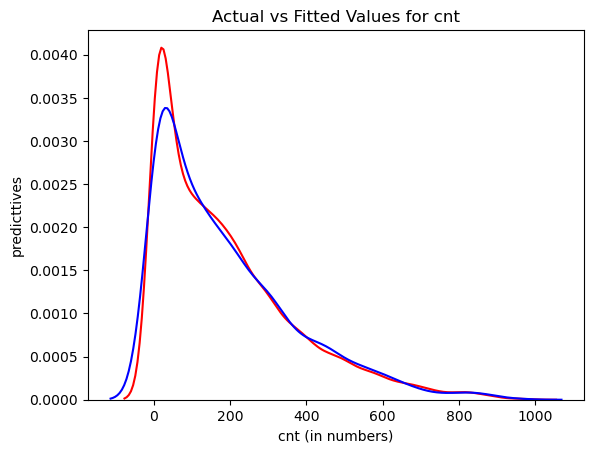

In [82]:
ax1=sns.distplot(hour['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [83]:
print("metrics on train data \n")

print("r2score:", r2_score(y_train, y_hat))
print("mse:", mean_squared_error(y_train, y_hat))
print("rmse:", math.sqrt(mean_squared_error(y_train, y_hat)))
print("mae:", mean_absolute_error(y_train, y_hat))

metrics on train data 

r2score: 0.9999646686276797
mse: 1.159523700243704
rmse: 1.0768118221136431
mae: 0.37648321148118047


In [84]:
adj_r2score = 1-(1-0.9999)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.9998999614346317


In [85]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.9998248258060274
mse: 5.843293785960876
rmse: 2.417290587819527
mae: 0.9405715381664751


In [86]:
adj_r2score = 1-(1-0.9998)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.9997999228692634


## Gradient Boosting

In [87]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_hat = gb.predict(X_train)
y_pred = gb.predict(X_test)

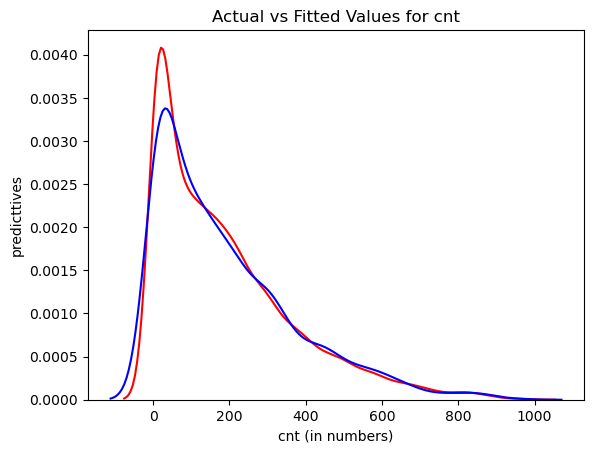

In [88]:
ax1=sns.distplot(hour['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [89]:
print("metrics on train data \n")

print("r2score:", r2_score(y_train, y_hat))
print("mse:", mean_squared_error(y_train, y_hat))
print("rmse:", math.sqrt(mean_squared_error(y_train, y_hat)))
print("mae:", mean_absolute_error(y_train, y_hat))

metrics on train data 

r2score: 0.9993124553683507
mse: 22.56420407751331
rmse: 4.750179373193533
mae: 3.0017459809194977


In [90]:
adj_r2score = 1-(1-0.9993)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.9992997300424219


In [91]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.999167764850814
mse: 27.76090681745287
rmse: 5.268862004024481
mae: 3.1592048466224076


In [92]:
adj_r2score = 1-(1-0.9991)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.9990996529116853


## XGBoost

In [93]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_hat = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

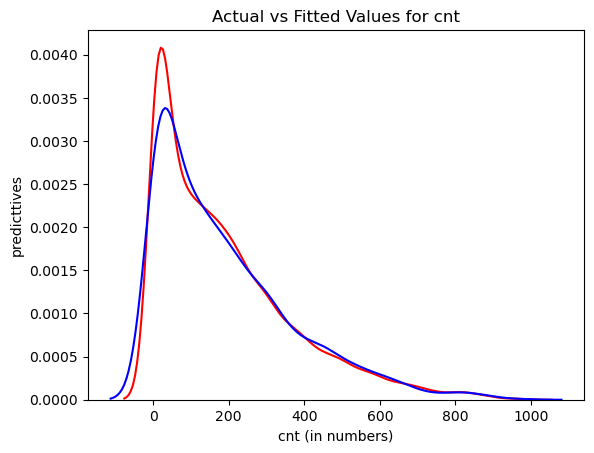

In [94]:
ax1=sns.distplot(hour['cnt'],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for cnt")
plt.xlabel("cnt (in numbers)")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [95]:
print("metrics on train data \n")

print("r2score:", r2_score(y_train, y_hat))
print("mse:", mean_squared_error(y_train, y_hat))
print("rmse:", math.sqrt(mean_squared_error(y_train, y_hat)))
print("mae:", mean_absolute_error(y_train, y_hat))

metrics on train data 

r2score: 0.9999297311058322
mse: 2.306121806958448
rmse: 1.5185920475751373
mae: 1.0434800369078443


In [96]:
adj_r2score = 1-(1-0.999)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.998999614346317


In [97]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.9997103073050431
mse: 9.663292782411135
rmse: 3.1085837261381806
mae: 1.7928274756516813


In [98]:
adj_r2score = 1-(1-0.9997)*(2607-13)/(2607-13-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.9996998843038951


# Evaluation Summary

#### R2 score is used to measure how well the a regressio model fits the data. But R2 score alone for a regression problem cannot always be considered to evaluate the performance of model.  As the number of predictors increases, R2 score also increases even if those variables are not truely important.

#### To overcome this issue, we have also checked adjusted R2 score.

In [99]:
# creating a dictionary
dict={"Model":["Linear Regression","Support Vector","K Nearest Neighbor","Decision Tree","Random Forest","Gradient Boosting","XGradient Boosting"],
     "R2_Score":[1.0, 0.91, 0.95, 0.999, 0.999, 0.999, 0.999],
     "Adjusted R2_Score":[1.0, 0.91, 0.95, 0.999, 0.999, 0.999, 0.999],
     "MSE":[1.70971760935966e-25, 2997.682330155265, 1578.3418573924905, 20.73801304181051, 5.3415799769850345, 27.760906817452764, 9.663292782411135],
     "RMSE":[4.134873165357869e-13, 54.751094328380915, 39.728350801316815, 4.553900859901378, 2.3111858378298, 5.268862004024471, 3.1085837261381806 ],
     "MAE":[3.520917095789142e-13, 34.60572697067464, 27.872522695307506, 2.2823168392788644, 0.9195013425393167, 3.159204846622397, 1.7928274756516813]}  

In [100]:
scores=pd.DataFrame(dict)

In [101]:
score=scores.sort_values(by="R2_Score")
score

Model  R2_Score  Adjusted R2_Score           MSE  \
1      Support Vector     0.910              0.910  2.997682e+03   
2  K Nearest Neighbor     0.950              0.950  1.578342e+03   
3       Decision Tree     0.999              0.999  2.073801e+01   
4       Random Forest     0.999              0.999  5.341580e+00   
5   Gradient Boosting     0.999              0.999  2.776091e+01   
6  XGradient Boosting     0.999              0.999  9.663293e+00   
0   Linear Regression     1.000              1.000  1.709718e-25   

           RMSE           MAE  
1  5.475109e+01  3.460573e+01  
2  3.972835e+01  2.787252e+01  
3  4.553901e+00  2.282317e+00  
4  2.311186e+00  9.195013e-01  
5  5.268862e+00  3.159205e+00  
6  3.108584e+00  1.792827e+00  
0  4.134873e-13  3.520917e-13

In [102]:
score=scores.sort_values(by="MSE")
score

Model  R2_Score  Adjusted R2_Score           MSE  \
0   Linear Regression     1.000              1.000  1.709718e-25   
4       Random Forest     0.999              0.999  5.341580e+00   
6  XGradient Boosting     0.999              0.999  9.663293e+00   
3       Decision Tree     0.999              0.999  2.073801e+01   
5   Gradient Boosting     0.999              0.999  2.776091e+01   
2  K Nearest Neighbor     0.950              0.950  1.578342e+03   
1      Support Vector     0.910              0.910  2.997682e+03   

           RMSE           MAE  
0  4.134873e-13  3.520917e-13  
4  2.311186e+00  9.195013e-01  
6  3.108584e+00  1.792827e+00  
3  4.553901e+00  2.282317e+00  
5  5.268862e+00  3.159205e+00  
2  3.972835e+01  2.787252e+01  
1  5.475109e+01  3.460573e+01

# Conclusion

#### After analysing all the metrics, we can conclude that `Linear regression` is the best model for our regression problem.
#### Although the models decision tree, random forest, gradient boosting and xg boost have equal values for R2_score and Adjusted R2_score, random forest has least values for MSE, RMSE and MAE.
#### Hence the second best model for this problem is `Random Forest'.

### Task 1: Prepare a complete data analysis report on the given data.

● Univariate, bivariate and multivariate analysis are done for the given data.

### Task 2: Prediction of daily bike rental count based on the environmental and seasonal settings.

● After data preprocessing, the data was tested under different regression models.

## Challenges Faced:

* There were outliers on the independent features, which when imputed with median, upper limit and lower limit didn't give a better metrics for the model. 
* We have seen that the outliers are not affecting the performance of models. So we didn't impute or remove the outliers here.
* There were outliers on the Target field(cnt), which are neither removed nor imputed with any values. 